In [1]:
# Artificial Neural Network

# Importing the libraries
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf
#tf.__version__

Using TensorFlow backend.


In [2]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


In [3]:
# Encoding categorical data
# Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [4]:
# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train.shape

(8000, 12)

In [6]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
# Part 2 - Building the ANN

# Initializing the ANN


ann = Sequential()

# Adding the input layer and the first hidden layer
ann.add(Dense(6, input_shape = (12, ), activation='relu'))

# Adding the second hidden layer
ann.add(Dense(6, activation='relu'))

# Adding the output layer
ann.add(Dense(1, activation='sigmoid'))

ann.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [26]:
ann.get_weights()
import pydot
import pydotplus
#import pydotprint
from keras.utils.vis_utils import plot_model    
plot_model(ann, to_file='model_plot.png', show_shapes=True, show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96)



ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [12]:

!pip3 install pydot
!pip3 install graphviz
!pip install pydotplus
!pip install pydotprint

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=57c10b34dd9425633f80e1d0c49caf1861b73a6d4c62776ee4371842a7c0b0a2
  Stored in directory: c:\users\anselem\appdata\local\pip\cache\wheels\1e\7b\04\7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


ERROR: Could not find a version that satisfies the requirement pydotprint (from versions: none)
ERROR: No matching distribution found for pydotprint


In [28]:
import pydot
import pydotplus

In [16]:
# Part 3 - Training the ANN

# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

# Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

# Part 4 - Making the predictions and evaluating the model

# Predicting the result of a single observation



Epoch 1/100
8000/8000 [==============================] - 4s 558us/step - loss: 0.6072 - accuracy: 0.7178
Epoch 2/100
8000/8000 [==============================] - 0s 58us/step - loss: 0.4705 - accuracy: 0.7969
Epoch 3/100
8000/8000 [==============================] - 1s 73us/step - loss: 0.4405 - accuracy: 0.8064
Epoch 4/100
8000/8000 [==============================] - 0s 62us/step - loss: 0.4282 - accuracy: 0.8134
Epoch 5/100
8000/8000 [==============================] - 1s 65us/step - loss: 0.4218 - accuracy: 0.8165
Epoch 6/100
8000/8000 [==============================] - 0s 53us/step - loss: 0.4171 - accuracy: 0.8201
Epoch 7/100
8000/8000 [==============================] - 0s 52us/step - loss: 0.4128 - accuracy: 0.8246
Epoch 8/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.4093 - accuracy: 0.8279
Epoch 9/100
8000/8000 [==============================] - 0s 61us/step - loss: 0.4061 - accuracy: 0.8282
Epoch 10/100
8000/8000 [==============================] - 0s 51

8000/8000 [==============================] - 0s 53us/step - loss: 0.3328 - accuracy: 0.8634
Epoch 80/100
8000/8000 [==============================] - 0s 57us/step - loss: 0.3325 - accuracy: 0.8650
Epoch 81/100
8000/8000 [==============================] - 0s 48us/step - loss: 0.3329 - accuracy: 0.8641
Epoch 82/100
8000/8000 [==============================] - 0s 57us/step - loss: 0.3325 - accuracy: 0.8650
Epoch 83/100
8000/8000 [==============================] - 0s 53us/step - loss: 0.3326 - accuracy: 0.8652
Epoch 84/100
8000/8000 [==============================] - 0s 51us/step - loss: 0.3325 - accuracy: 0.8636
Epoch 85/100
8000/8000 [==============================] - 0s 55us/step - loss: 0.3326 - accuracy: 0.8650
Epoch 86/100
8000/8000 [==============================] - 0s 55us/step - loss: 0.3323 - accuracy: 0.8658
Epoch 87/100
8000/8000 [==============================] - 0s 54us/step - loss: 0.3321 - accuracy: 0.8634
Epoch 88/100
8000/8000 [==============================] - 0s 50us/st

In [17]:
# Part 4 - Making the predictions and evaluating the model

# Predicting the result of a single observation

"""
Homework:
Use our ANN model to predict if the customer with the following informations will leave the bank: 
Geography: France
Credit Score: 600
Gender: Male
Age: 40 years old
Tenure: 3 years
Balance: $ 60000
Number of Products: 2
Does this customer have a credit card? Yes
Is this customer an Active Member: Yes
Estimated Salary: $ 50000
So, should we say goodbye to that customer?

Solution:
"""

print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

"""
Therefore, our ANN model predicts that this customer stays in the bank!
Important note 1: Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.
Important note 2: Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.
"""

[[False]]


'\nTherefore, our ANN model predicts that this customer stays in the bank!\nImportant note 1: Notice that the values of the features were all input in a double pair of square brackets. That\'s because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.\nImportant note 2: Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That\'s because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.\n'

In [18]:
# Predicting the Test set results
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [19]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1510   85]
 [ 201  204]]


0.857

In [20]:
history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100)

print(history.history['accuracy'])
print(history.history['loss'])
print(history.history['val_loss'])
print(history.history['val_accuracy'])


Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 1s 69us/step - loss: 0.3315 - accuracy: 0.8659 - val_loss: 0.3406 - val_accuracy: 0.8565
Epoch 2/100
8000/8000 [==============================] - 0s 59us/step - loss: 0.3312 - accuracy: 0.8654 - val_loss: 0.3415 - val_accuracy: 0.8530
Epoch 3/100
8000/8000 [==============================] - 0s 61us/step - loss: 0.3309 - accuracy: 0.8648 - val_loss: 0.3404 - val_accuracy: 0.8535
Epoch 4/100
8000/8000 [==============================] - 0s 56us/step - loss: 0.3309 - accuracy: 0.8639 - val_loss: 0.3399 - val_accuracy: 0.8565
Epoch 5/100
8000/8000 [==============================] - 0s 60us/step - loss: 0.3309 - accuracy: 0.8656 - val_loss: 0.3417 - val_accuracy: 0.8535
Epoch 6/100
8000/8000 [==============================] - ETA: 0s - loss: 0.3324 - accuracy: 0.86 - 0s 56us/step - loss: 0.3308 - accuracy: 0.8651 - val_loss: 0.3402 - val_accuracy: 0.8545
Epoch 7/100
8000/8000 [===========

8000/8000 [==============================] - 1s 73us/step - loss: 0.3293 - accuracy: 0.8636 - val_loss: 0.3376 - val_accuracy: 0.8585
Epoch 57/100
8000/8000 [==============================] - 1s 67us/step - loss: 0.3289 - accuracy: 0.8651 - val_loss: 0.3371 - val_accuracy: 0.8575
Epoch 58/100
8000/8000 [==============================] - 1s 69us/step - loss: 0.3288 - accuracy: 0.8666 - val_loss: 0.3390 - val_accuracy: 0.8535
Epoch 59/100
8000/8000 [==============================] - 1s 85us/step - loss: 0.3290 - accuracy: 0.8645 - val_loss: 0.3378 - val_accuracy: 0.8540
Epoch 60/100
8000/8000 [==============================] - 1s 81us/step - loss: 0.3290 - accuracy: 0.8648 - val_loss: 0.3388 - val_accuracy: 0.8530
Epoch 61/100
8000/8000 [==============================] - 1s 87us/step - loss: 0.3287 - accuracy: 0.8659 - val_loss: 0.3377 - val_accuracy: 0.8585
Epoch 62/100
8000/8000 [==============================] - 1s 89us/step - loss: 0.3291 - accuracy: 0.8648 - val_loss: 0.3399 - val_a

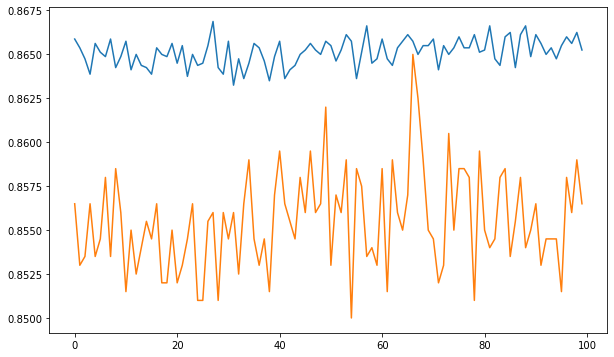

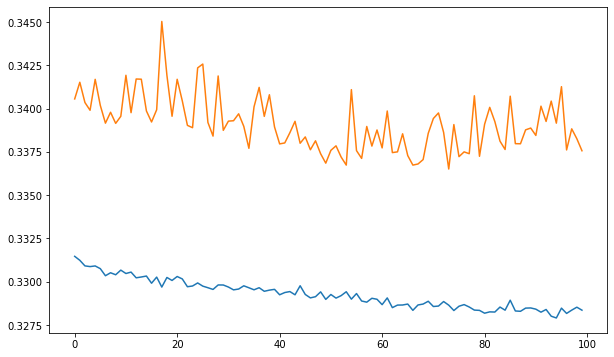

In [21]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]


plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()
